In [1]:
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA, TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples, mean_squared_error
from sklearn.random_projection import GaussianRandomProjection
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from numpy import linalg as LA

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy
from scipy.linalg import pinv
import pandas as pd

import itertools
import scipy.stats

import time

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler

# Prepare Data

In [3]:
data = pd.read_csv('data/BCW_train.csv')

y = data.diagnosis
y = y.values
y[y == 'B'] = 0
y[y == 'M'] = 1
y = y.astype(int)

X = data.drop(['id','diagnosis','Unnamed: 32'], axis=1)

print("Number of samples:", y.size)
print("Percentage of malignant cases:", y[y==1].size/y.size*100)

print("Splitting into train/test sets...")
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Setting up global variables...")
classifier_accuracy = np.zeros(6)
time_train = np.zeros(6)
time_infer = np.zeros(6)

Number of samples: 569
Percentage of malignant cases: 37.258347978910365
Splitting into train/test sets...
Setting up global variables...


# Experiment1: Clustering

# 1.1 K-Means
# Clusters selection

# Inertia

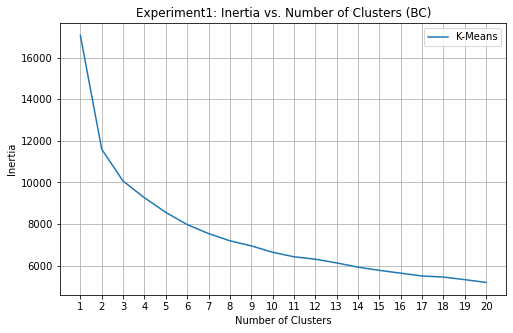

In [5]:
range_n_clusters = np.arange(1,21,1)
inertia = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X)
    inertia.append(k_means_clustering.inertia_)
inertia = np.array(inertia)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,inertia, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters)
plt.title('Experiment1: Inertia vs. Number of Clusters (BC)')
plt.grid()
plt.legend()
plt.savefig('bc_exp1_kmeans_inertia.png')
plt.show()

# Silhouette Score

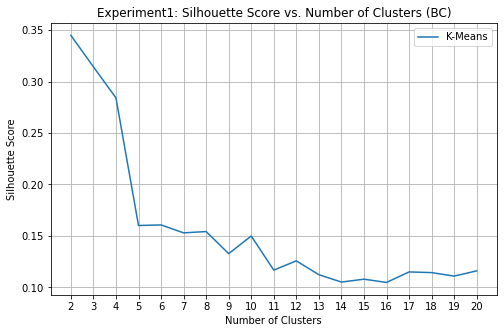

In [6]:
range_n_clusters = np.arange(2,21,1)
silhouette_avg = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X)
    silhouette_avg.append(silhouette_score(X, k_means_clustering.labels_))
silhouette_avg = np.array(silhouette_avg)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,silhouette_avg, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters) 
plt.title('Experiment1: Silhouette Score vs. Number of Clusters (BC)')
plt.grid()
plt.legend()
plt.savefig('bc_exp1_kmeans_silhouette.png')
plt.show()

# Analysis

# adjusted_mutual_info_score

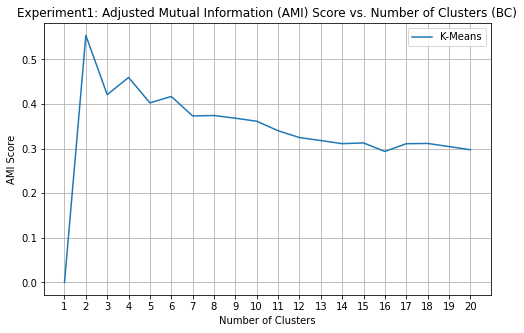

In [7]:
range_n_clusters = np.arange(1,21,1)
adjusted_mutual_info_score_value = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X)
    adjusted_mutual_info_score_value.append(adjusted_mutual_info_score(y, k_means_clustering.labels_))
adjusted_mutual_info_score_value = np.array(adjusted_mutual_info_score_value)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,adjusted_mutual_info_score_value, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('AMI Score')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters) 
plt.title('Experiment1: Adjusted Mutual Information (AMI) Score vs. Number of Clusters (BC)')
plt.grid()
plt.legend()
plt.savefig('bc_exp1_kmeans_AMI.png')
plt.show()

# performance

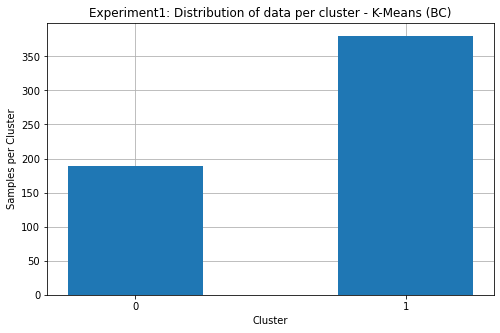

In [8]:
k = 2
k_means_clustering = KMeans(n_clusters=k, random_state=42)
y_pred = k_means_clustering.fit_predict(X)


plt.figure(figsize=(8,5))
plt.hist(y_pred, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster')
plt.ylabel('Samples per Cluster')
plt.title('Experiment1: Distribution of data per cluster - K-Means (BC)')
plt.grid()
plt.savefig('bc_exp1_kmeans_distribution.png')

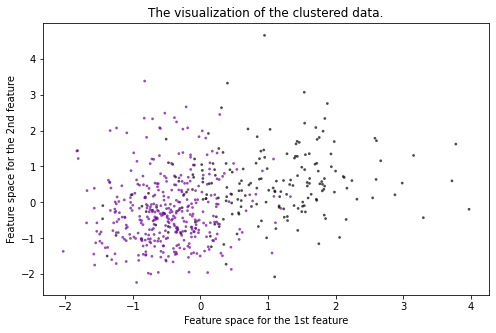

In [9]:
k_means_opt = KMeans(n_clusters=2, random_state=42)
k_means_opt.fit(X)
cluster_labels = k_means_opt.labels_
colors = cm.nipy_spectral(cluster_labels.astype(float) / 9)
plt.figure(figsize=(8,5))
plt.scatter( X[:, 0], X[:, 1],marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
# Labeling the clusters
# centers = k_means_opt.cluster_centers_
# # Draw white circles at cluster centers
# plt.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

# for i, c in enumerate(centers):
#     plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title("The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.savefig('bc_exp1_kmeans_plot.png')
plt.show()

In [13]:
X[1]

array([ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,  1.90870825e+00,
       -8.26962447e-01, -4.87071673e-01, -2.38458552e-02,  5.48144156e-01,
        1.39236330e-03, -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
        2.63326966e-01,  7.42401948e-01, -6.05350847e-01, -6.92926270e-01,
       -4.40780058e-01,  2.60162067e-01, -8.05450380e-01, -9.94437403e-02,
        1.80592744e+00, -3.69203222e-01,  1.53512599e+00,  1.89048899e+00,
       -3.75611957e-01, -4.30444219e-01, -1.46748968e-01,  1.08708430e+00,
       -2.43889668e-01,  2.81189987e-01])

# 1.2 GMM
# Select Component numbers
# BIC

In [10]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X)
        bic[i][j] = gmm.bic(X)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            print("Lowest BIC currently for", covariance, num_components)
            best_gmm = gmm

Lowest BIC currently for spherical 1
Lowest BIC currently for spherical 2
Lowest BIC currently for spherical 3
Lowest BIC currently for spherical 4
Lowest BIC currently for spherical 5
Lowest BIC currently for spherical 6
Lowest BIC currently for spherical 7
Lowest BIC currently for spherical 8
Lowest BIC currently for spherical 9
Lowest BIC currently for spherical 11
Lowest BIC currently for spherical 14
Lowest BIC currently for spherical 15
Lowest BIC currently for spherical 17
Lowest BIC currently for spherical 18
Lowest BIC currently for spherical 19
Lowest BIC currently for tied 1
Lowest BIC currently for tied 2
Lowest BIC currently for tied 3
Lowest BIC currently for tied 4
Lowest BIC currently for tied 6
Lowest BIC currently for tied 7
Lowest BIC currently for tied 8
Lowest BIC currently for tied 11
Lowest BIC currently for tied 18
Lowest BIC currently for full 2


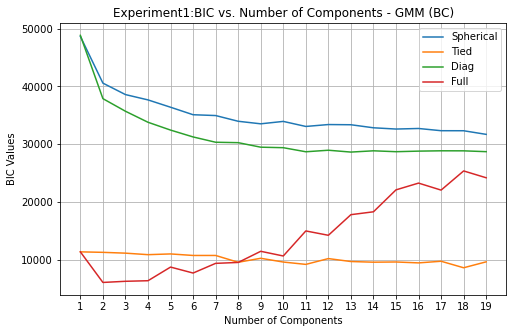

In [11]:
plt.figure(figsize=(8,5))
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values)
plt.grid()
plt.title("Experiment1:BIC vs. Number of Components - GMM (BC)")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.savefig('bc_exp1_gmm_bic.png')
plt.show()

# silhouette

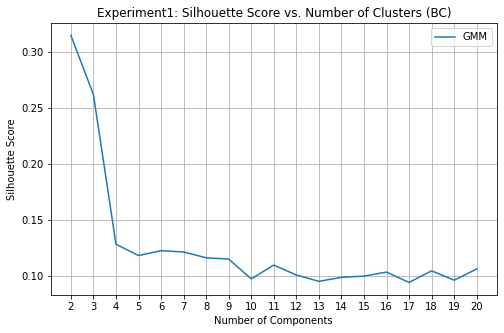

In [13]:
num_components_values = np.arange(2,21,1)
silhouette_avg = []
for num_components in num_components_values:
    gmm = mixture.GaussianMixture(n_components=num_components, covariance_type="full")
    gmm_labels = gmm.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, gmm_labels))
silhouette_avg = np.array(silhouette_avg)
plt.figure(figsize=(8,5))
plt.plot(num_components_values,silhouette_avg, label = "GMM")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values) 
plt.title('Experiment1: Silhouette Score vs. Number of Clusters (BC)')
plt.grid()
plt.legend()
plt.savefig('bc_exp1_gmm_silhouette.png')
plt.show()

# Analysis
# adjusted_mutual_info_score

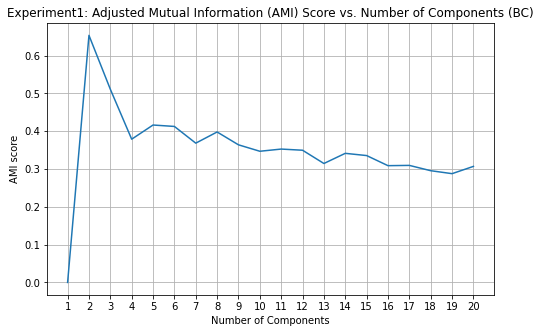

In [14]:
num_components_values = np.arange(1,21,1)
adjusted_mutual_info_score_value = []
for num_components in num_components_values:
    gmm = mixture.GaussianMixture(n_components=num_components, covariance_type="full")
    gmm_labels = gmm.fit_predict(X)
    adjusted_mutual_info_score_value.append(adjusted_mutual_info_score(y, gmm_labels))
adjusted_mutual_info_score_value = np.array(adjusted_mutual_info_score_value)
plt.figure(figsize=(8,5))
plt.plot(num_components_values,adjusted_mutual_info_score_value, label = "GMM")
plt.xlabel('Number of Components')
plt.ylabel('AMI score')
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values) 
plt.title('Experiment1: Adjusted Mutual Information (AMI) Score vs. Number of Components (BC)')
plt.grid()
plt.savefig('bc_exp1_gmm_AMI.png')
plt.show()

# performance

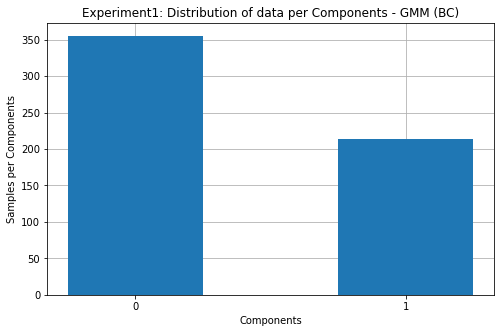

In [4]:
k = 2
gmm = mixture.GaussianMixture(n_components=k, covariance_type="full")
gmm_labels = gmm.fit_predict(X)


plt.figure(figsize=(8,5))
plt.hist(gmm_labels, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Components')
plt.ylabel('Samples per Components')
plt.title('Experiment1: Distribution of data per Components - GMM (BC)')
plt.grid()
plt.savefig('bc_exp1_gmm_distribution.png')

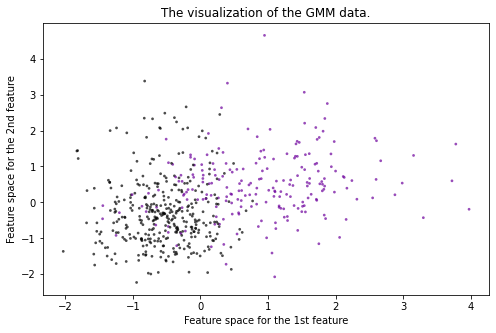

In [16]:
gmm_opt = mixture.GaussianMixture(n_components=2, covariance_type="full")
gmm_labels = gmm_opt.fit_predict(X)
colors = cm.nipy_spectral(gmm_labels.astype(float) / 9)
plt.figure(figsize=(8,5))
plt.scatter( X[:, 0], X[:, 1],marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
# Labeling the clusters
# centers = gmm_opt.cluster_centers_
# Draw white circles at cluster centers
# plt.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

# for i, c in enumerate(centers):
#     plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title("The visualization of the GMM data.")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.savefig('bc_exp1_gmm_plot.png')
plt.show()

# Experiment2: Dimensionality Reduction
# PCA

In [4]:
pca = PCA()
pca.fit(X)

PCA()

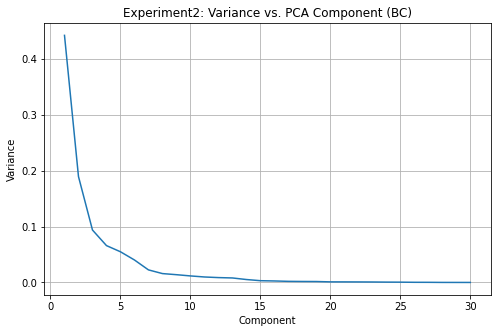

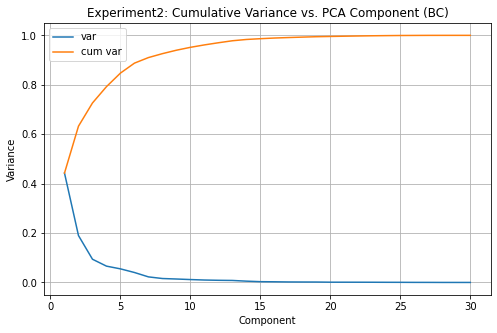

In [6]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_)
# plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 2))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Experiment2: Variance vs. PCA Component (BC)')
plt.grid()
plt.savefig('bc_exp2_pca_variance.png')

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_, label='var')
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), np.cumsum(pca.explained_variance_ratio_), label='cum var')
# plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 2))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Experiment2: Cumulative Variance vs. PCA Component (BC)')
plt.legend()
plt.grid()
plt.savefig('bc_exp2_pca_cumu_variance.png')

In [19]:
X_=X_train[:200]
X_std_=StandardScaler().fit_transform(X_)
pca_=PCA(3)
X_5d=pca_.fit_transform(X_std_)
Target=y_train[:200]
eigenvalues_=pca_.components_
trace = go.Scatter(
    x = X_5d[:,0],
    y = X_5d[:,1],
    name = str(Target),
    
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        
        opacity = 0.8
    )
)

data=[trace]

layout=go.Layout(title='PCA',
                hovermode='closest',
                xaxis=dict(
                    title='First principal direction',
                    ticklen=5,
                    zeroline=False),
                 yaxis=dict(
                 title='Second principal direction',
                 ticklen=5
            ),
                 showlegend=True
                
                    
                )
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='pca')

# ICA

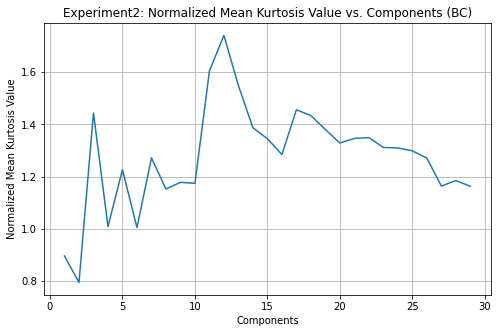

In [20]:
kurtosis_values = []
for i in range(1,30):
    X_ICA = FastICA(n_components = i).fit_transform(X)
    kur = scipy.stats.kurtosis(X_ICA)
    kurtosis_values.append(np.mean(kur)/i)
kurtosis_values = np.array(kurtosis_values)
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,30),kurtosis_values)
plt.xlabel('Components')
plt.ylabel('Normalized Mean Kurtosis Value')
plt.grid()
plt.title('Experiment2: Normalized Mean Kurtosis Value vs. Components (BC)')
plt.savefig('bc_exp2_ica_Kurtosise.png')
plt.show()

In [21]:
X_=X_train[:200]
X_std_=StandardScaler().fit_transform(X_)
ica_=FastICA(n_components = 3)
X_3d=ica_.fit_transform(X_std_)
Target=y_train[:200]
eigenvalues_=ica_.components_
trace = go.Scatter(
    x = X_3d[:,0],
    y = X_3d[:,1],
    name = str(Target),
    
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        
        opacity = 0.8
    )
)

data=[trace]

layout=go.Layout(title='ICA',
                hovermode='closest',
                xaxis=dict(
                    title='First principal direction',
                    ticklen=5,
                    zeroline=False),
                 yaxis=dict(
                 title='Second principal direction',
                 ticklen=5
            ),
                 showlegend=True
                
                    
                )
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='ICA')

# Randomized Projections

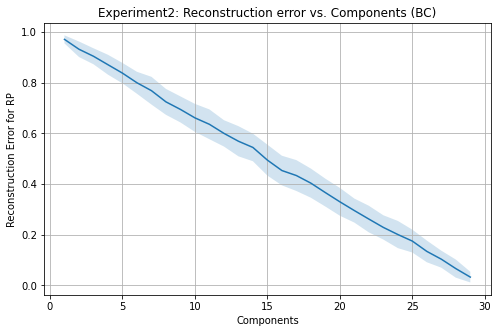

In [22]:
reconstruction_error = []
reconstruction_variance = []
for i in range(1,30):
    mean_mse = []
    for j in range(0,100):
        rp = GaussianRandomProjection(n_components=i)
        X_RP = rp.fit(X)
        w = X_RP.components_
        p = pinv(w)
        reconstructed = ((p@w)@(X.T)).T
        mean_mse.append(mean_squared_error(X,reconstructed))
    reconstruction_variance.append(np.std(mean_mse))
    reconstruction_error.append(np.mean(mean_mse))

reconstruction_error = np.array(reconstruction_error)
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,30),reconstruction_error)
plt.fill_between(np.arange(1,30),reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
plt.xlabel('Components')
plt.ylabel('Reconstruction Error for RP')
plt.title('Experiment2: Reconstruction error vs. Components (BC)')
plt.grid()
plt.savefig('bc_exp2_rp_Reconstruction_error.png')
plt.show()

In [23]:
X_=X_train[:200]
X_std_=StandardScaler().fit_transform(X_)
rp_ = GaussianRandomProjection(n_components=10)
X_3d=rp_.fit_transform(X_std_)
Target=y_train[:200]
eigenvalues_=rp_.components_
trace = go.Scatter(
    x = X_3d[:,0],
    y = X_3d[:,1],
    name = str(Target),
    
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        
        opacity = 0.8
    )
)

data=[trace]

layout=go.Layout(title='Randomized Projections',
                hovermode='closest',
                xaxis=dict(
                    title='First principal direction',
                    ticklen=5,
                    zeroline=False),
                 yaxis=dict(
                 title='Second principal direction',
                 ticklen=5
            ),
                 showlegend=True
                
                    
                )
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='Randomized Projections')

# Feature Selection using Trees

In [7]:
etc = ExtraTreesClassifier(n_estimators = 100)
etc = etc.fit(X,y)
print(etc.feature_importances_)
model = SelectFromModel(etc, prefit=True)
X_Trees = model.transform(X)
print(model.get_support())
X_Trees_train, X_Trees_test, y_Trees_train, y_Trees_test = train_test_split(X_Trees, y, test_size=0.3, random_state=42)

[0.04223773 0.02199224 0.06763834 0.06208957 0.01009873 0.01761849
 0.02568315 0.09692522 0.0077803  0.00647473 0.01940488 0.00488859
 0.01763385 0.0391057  0.00567986 0.00547761 0.01175598 0.01235698
 0.00531979 0.00610574 0.07215375 0.02874163 0.10400391 0.08848329
 0.01945228 0.02752642 0.05634376 0.08752503 0.01835599 0.01114647]
[ True False  True  True False False False  True False False False False
 False  True False False False False False False  True False  True  True
 False False  True  True False False]


In [9]:
Target=y_Trees_train[:200]
trace = go.Scatter(
    x = X_Trees_train[:,0],
    y = y_Trees_train,
    name = str(Target),
    
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        
        opacity = 0.8
    )
)

data=[trace]

layout=go.Layout(title='Decision Trees',
                hovermode='closest',
                xaxis=dict(
                    title='First principal direction',
                    ticklen=5,
                    zeroline=False),
                 yaxis=dict(
                 title='Second principal direction',
                 ticklen=5
            ),
                 showlegend=True
                
                    
                )
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='Randomized Projections')

ValueError: 'c' argument has 569 elements, which is inconsistent with 'x' and 'y' with size 30.

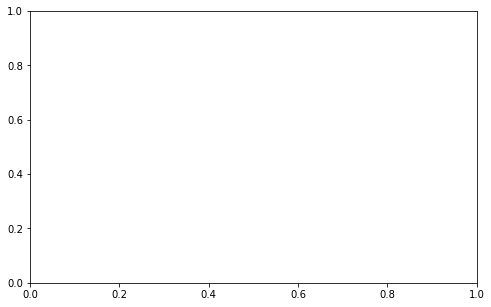

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(etc.feature_importances_ ,model.get_support(),marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
# Labeling the clusters
plt.yticks([0, 1], ['Drop', 'Selected']) 
plt.title("The visualization of Feature Selection using Trees.")
plt.savefig('bc_exp2_dt.png')
plt.show()